<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/LP3/blob/main/LP3_Stella_Oiro_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting Customer Churn: An Analysis of Key Indicators and Retention Strategies

The aim of this project is to identify the key indicators of customer churn and develop retention strategies to reduce customer attrition. The project uses a dataset containing information on customers' demographics, services used, and payment history to analyze the factors that contribute to customer churn. The project involves data cleaning and exploratory data analysis to identify patterns and trends within the data, followed by the development of hypotheses and classification algorithms to predict customer churn. The findings of the analysis will be used to develop retention strategies aimed at reducing customer churn and improving customer satisfaction.

###Hypothesis
**Null hypothesis**: There is no significant relationship between any of the independent variables (gender, senior citizen status, partner, dependents, tenure, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, monthly charges, total charges) and customer churn.

**Alternative hypothesis**: There is a significant relationship between at least one of the independent variables and customer churn.

###Questions

1.Is there a correlation between contract length and customer churn?

2.Do customers who have online security and backup services have lower churn rates?

3.Does the payment method have an impact on customer churn?

4.Is there a difference in churn rates between male and female customers?

5.Are customers with dependents less likely to churn compared to those without dependents?

In [56]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

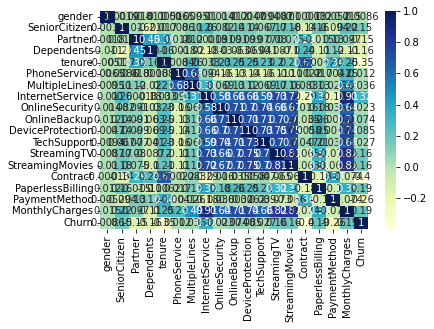

<AxesSubplot:ylabel='Count'>

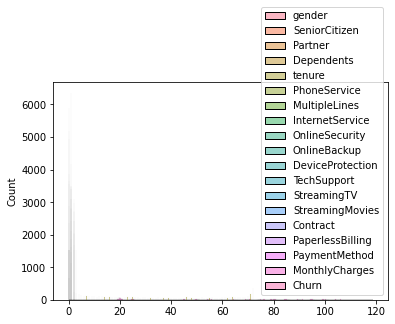

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


# read the data
df_churn = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

# check the first few rows
print(df_churn.head())

# check the shape of the data
print(df_churn.shape)

# check for missing values
print(df_churn.isna().sum())

# check for duplicates
print(df_churn.duplicated().sum())

# drop duplicates
df_churn.drop_duplicates(inplace=True)

# check the data types of each column
print(df_churn.dtypes)

#check info about the dataset
df_churn.info()

# encode categorical variables
df_churn['gender'] = df_churn['gender'].map({'Male': 0, 'Female': 1})
df_churn['Partner'] = df_churn['Partner'].map({'No': 0, 'Yes': 1})
df_churn['Dependents'] = df_churn['Dependents'].map({'No': 0, 'Yes': 1})
df_churn['PhoneService'] = df_churn['PhoneService'].map({'No': 0, 'Yes': 1})
df_churn['MultipleLines'] = df_churn['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
df_churn['InternetService'] = df_churn['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['TechSupport'] = df_churn['TechSupport'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['StreamingTV'] = df_churn['StreamingTV'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].map({'No internet service': 0, 'No': 1, 'Yes': 2})
df_churn['Contract'] = df_churn['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df_churn['Churn'] = df_churn['Churn'].map({'No': 0, 'Yes': 1})

# check the distribution of the target variable
print(df_churn['Churn'].value_counts())

# create a correlation matrix
corr_matrix = df_churn.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# visualize the distribution of continuous variables
sns.histplot(data=df_churn)


## Unvariate Analysis

In [58]:
 # Generate descriptive statistics of the churn_df DataFra
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,1.325004,0.642730,0.00,1.0,1.00,2.00,2.00
InternetService,7043.0,1.222916,0.778877,0.00,1.0,1.00,2.00,2.00
OnlineSecurity,7043.0,1.069999,0.706051,0.00,1.0,1.00,2.00,2.00
OnlineBackup,7043.0,1.128212,0.738369,0.00,1.0,1.00,2.00,2.00


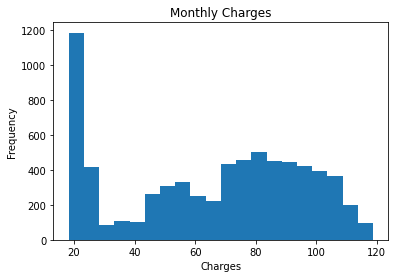

In [59]:
# Create a histogram of MonthlyCharges
plt.hist(df_churn['MonthlyCharges'], bins=20)
plt.title('Monthly Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


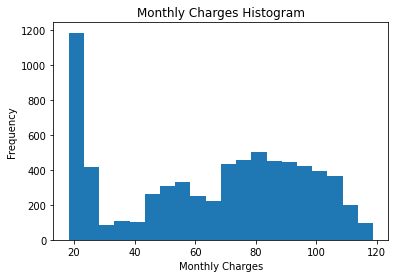

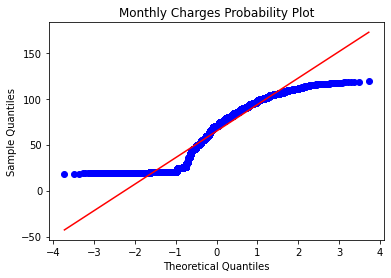

Monthly Charges Skewness: -0.22
Monthly Charges Kurtosis: -1.26


In [60]:
from scipy import stats

# Calculate skewness and kurtosis of MonthlyCharges
monthly_charges_skew = stats.skew(df_churn['MonthlyCharges'])
monthly_charges_kurtosis = stats.kurtosis(df_churn['MonthlyCharges'])

# Plot histogram of MonthlyCharges
plt.hist(df_churn['MonthlyCharges'], bins=20)
plt.title('Monthly Charges Histogram')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Plot probability plot of MonthlyCharges
stats.probplot(df_churn['MonthlyCharges'], plot=plt)
plt.title('Monthly Charges Probability Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Print skewness and kurtosis values
print(f"Monthly Charges Skewness: {monthly_charges_skew:.2f}")
print(f"Monthly Charges Kurtosis: {monthly_charges_kurtosis:.2f}")


The skewness of monthly charges is -0.22, which indicates a slightly left-skewed distribution, meaning that the distribution of monthly charges is not perfectly symmetrical, and there may be more customers paying lower monthly charges than higher charges.

Kurtosis of monthly charges is -1.26, which indicates a slightly flat distribution, meaning that the distribution of monthly charges is not very peaked, and there may be relatively fewer customers with very high or very low monthly charges compared to the middle range of charges.








## Multivariate Analysis

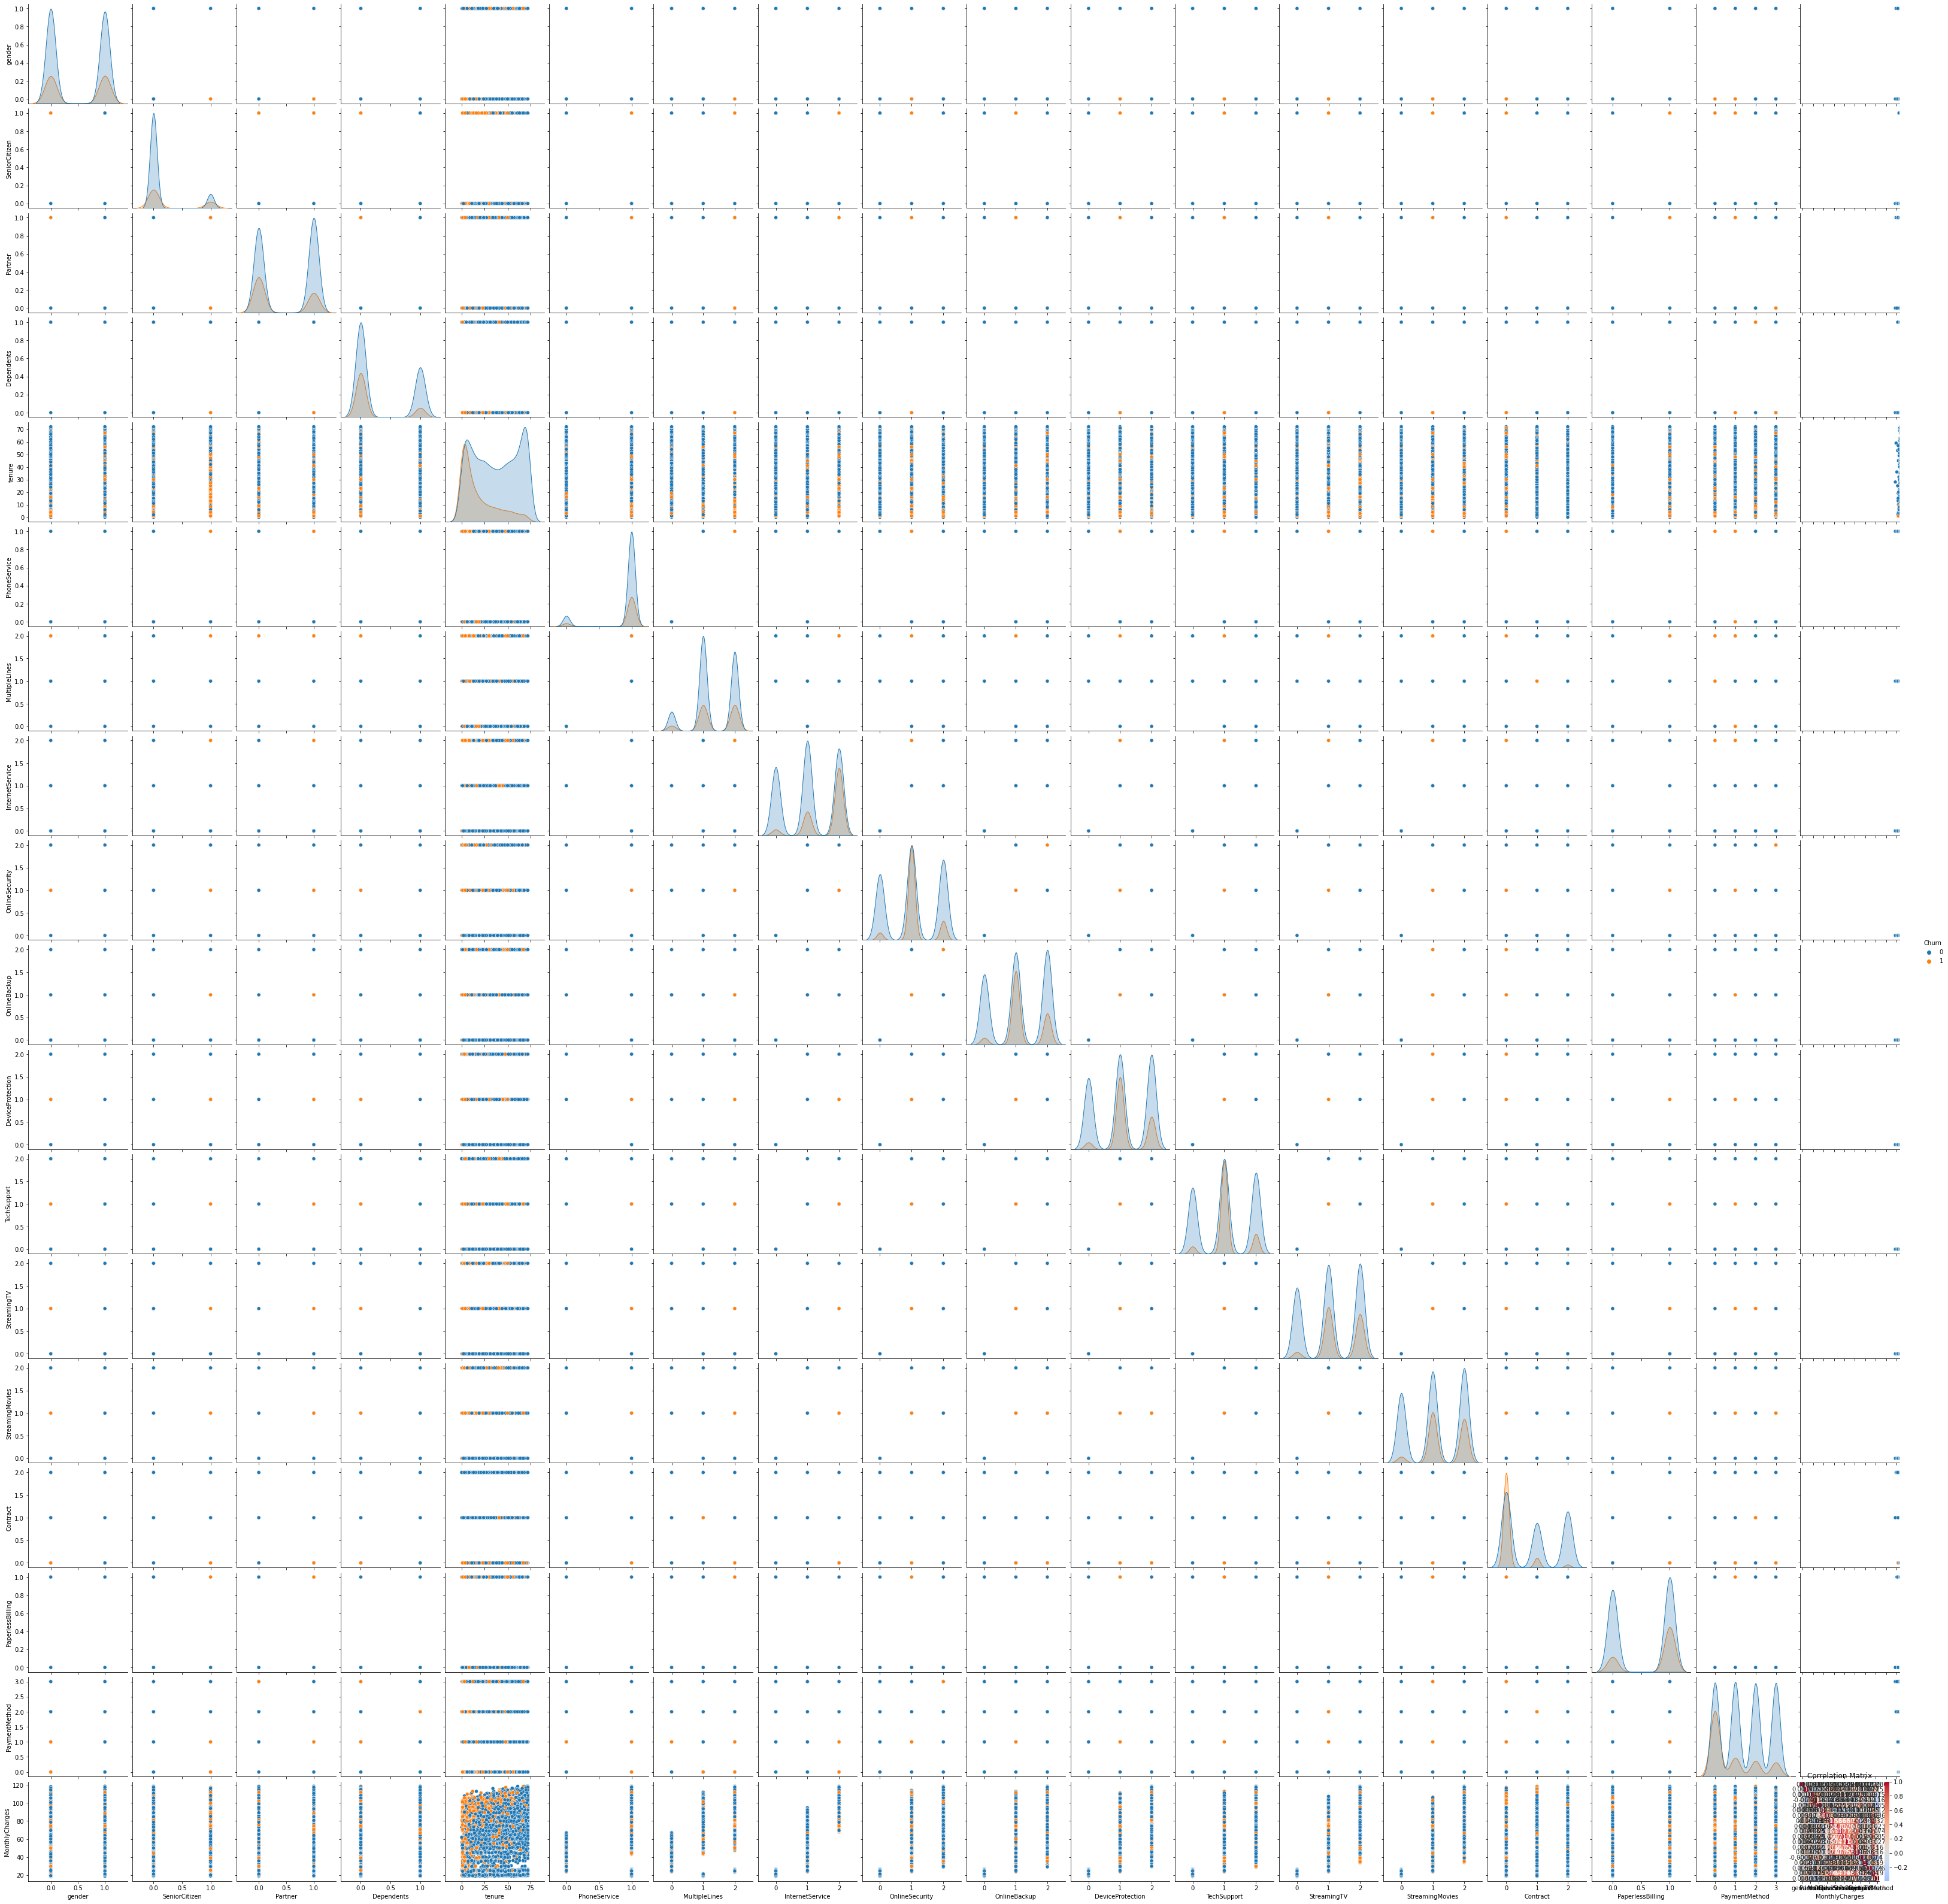

In [61]:
# Scatterplot matrix

sns.pairplot(df_churn, hue='Churn')

# Correlation matrix

corr_matrix = df_churn.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


<AxesSubplot:>

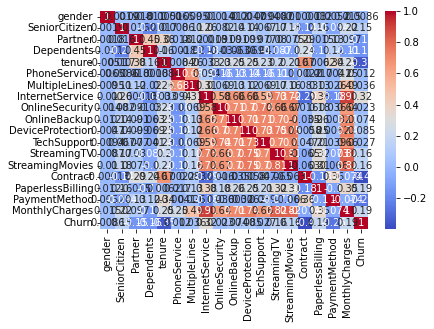

In [62]:
# Create correlation matrix
corr = df_churn.corr()

# Visualize correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)


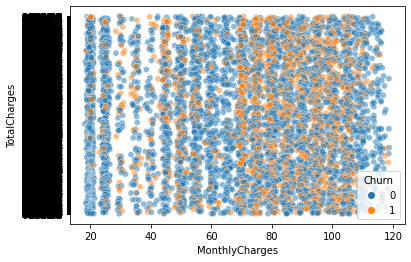

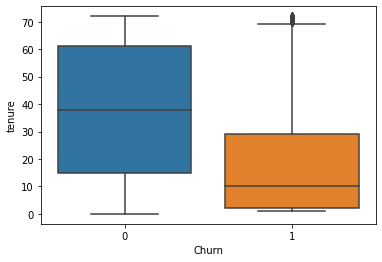

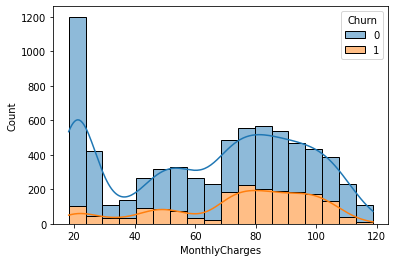

In [63]:
# Scatterplot of monthly charges and total charges
sns.scatterplot(data=df_churn, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)
plt.show()

# Boxplot of tenure and churn
sns.boxplot(data=df_churn, x='Churn', y='tenure')
plt.show()

# Histogram of monthly charges and churn
sns.histplot(data=df_churn, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()


####QS1.Is there a correlation between contract length and customer churn?

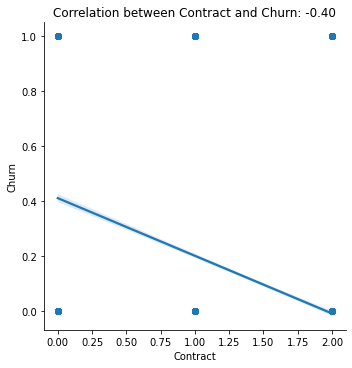

In [64]:

# Calculate correlation coefficient
corr_coef = df_churn['Contract'].corr(df_churn['Churn'])

# Create scatterplot with regression line
sns.lmplot(x='Contract', y='Churn', data=df_churn)

# Add correlation coefficient to plot
plt.title(f"Correlation between Contract and Churn: {corr_coef:.2f}")
plt.show()


There is a negative correlation meaning longer contracts are associated with lower churn rates.

####QS2.Do customers who have online security and backup services have lower churn rates?

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

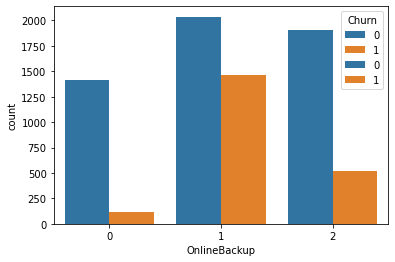

In [65]:
# create a countplot to compare churn rates for customers with and without online security
sns.countplot(x="OnlineSecurity", hue="Churn", data=df_churn)

# create a countplot to compare churn rates for customers with and without backup services
sns.countplot(x="OnlineBackup", hue="Churn", data=df_churn)


####QS3.Does the payment method have an impact on customer churn?

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

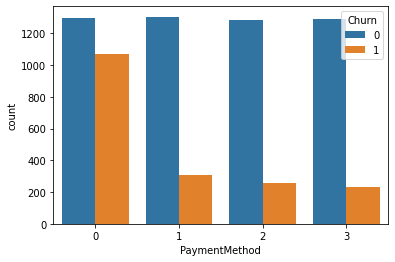

In [66]:
# create a countplot to compare churn rates for different payment methods
sns.countplot(x="PaymentMethod", hue="Churn", data=df_churn)


####QS4.Is there a difference in churn rates between male and female customers?

<AxesSubplot:xlabel='gender', ylabel='count'>

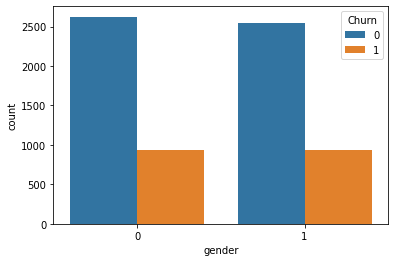

In [67]:
# create a countplot to compare churn rates for male and female customers
sns.countplot(x="gender", hue="Churn", data=df_churn)


####QS5.Are customers with dependents less likely to churn compared to those without dependents?

<AxesSubplot:xlabel='Dependents', ylabel='count'>

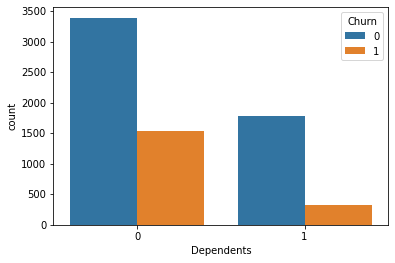

In [68]:
# create a countplot to compare churn rates for customers with and without dependents
sns.countplot(x="Dependents", hue="Churn", data=df_churn)


customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

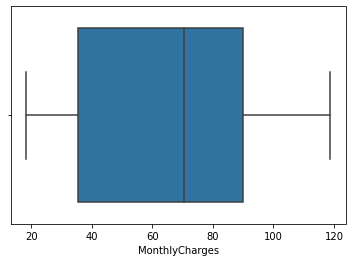

In [69]:
# Check for missing or null values
df_churn.isnull().sum()

# Check for outliers
sns.boxplot(x=df_churn['MonthlyCharges'])

# Verify data types
df_churn.dtypes


In [70]:
df_churn.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

### Model Building and Selection

### Logistic Regression

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dropping null values in TotalCharges column 
df_churn = df_churn[~df_churn['TotalCharges'].isin([' '])]

# Converting TotalCharges to float
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)

# Dropping unnecessary columns
df_churn = df_churn.drop(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis=1)

# Imputing missing values with mean value
imp = SimpleImputer(strategy='mean')
df_churn = imp.fit_transform(df_churn)

# Converting back to DataFrame
df_churn = pd.DataFrame(df_churn, columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])

# Splitting data into training and testing sets
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predicting on test set
y_pred = lr.predict(X_test)

# Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy: 0.7803837953091685
Confusion Matrix:
 [[935  98]
 [211 163]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1033
         1.0       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-Accuracy of 0.780 indicates that the model is able to predict correctly around 78% of the time.

-From the confusion matrix, it can be seen that the model is better at predicting non-churners than churners.

-Precision for non-churners is 0.82 and for churners is 0.62, which indicates that when the model predicts a non-churner, it is correct around 82% of the time and when it predicts a churner, it is correct around 62% of the time.

-Recall for non-churners is 0.91 and for churners is 0.44, which indicates that the model is able to identify around 91% of the non-churners and only around 44% of the churners.

-F1-score for non-churners is 0.86 and for churners is 0.51, which is the harmonic mean of precision and recall and indicates the balance between the two.



### Decision Tree

In [72]:
# Importing necessary library
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into train and test set
from sklearn.model_selection import train_test_split

# Defining the dependent and independent variables
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = dt.predict(X_test)

# Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7306325515280739
Confusion Matrix:
 [[855 178]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1033
         1.0       0.49      0.46      0.48       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



-Accuracy of 0.727 indicates that the model is able to predict correctly around 73% of the time.


-From the confusion matrix, it can be seen that the model is better at predicting non-churners than churners.


-Precision for non-churners is 0.81 and for churners is 0.49.


-Recall for non-churners is 0.82 and for churners is 0.46.


-F1-score for non-churners is 0.82 and for churners is 0.47.

### Random Forest

In [73]:
# Importing necessary library
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into train and test set
from sklearn.model_selection import train_test_split

# Defining the dependent and independent variables
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = rf.predict(X_test)

# Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7555081734186212
Confusion Matrix:
 [[904 129]
 [215 159]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1033
         1.0       0.55      0.43      0.48       374

    accuracy                           0.76      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.76      0.74      1407



-Accuracy of 0.759 indicates that the model is able to predict correctly around 76% of the time.


-From the confusion matrix, it can be seen that the model is better at predicting non-churners than churners.


-Precision for non-churners is 0.81 and for churners is 0.56.


-Recall for non-churners is 0.87 and for churners is 0.44.


-F1-score for non-churners is 0.84 and for churners is 0.49.

In [74]:
# CatBoost Classifier
!pip install catboost
from catboost import CatBoostClassifier

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a CatBoost Classifier
cat = CatBoostClassifier()

# Training the classifier on the training set
cat.fit(X_train, y_train)

# Making predictions on the test set
y_pred = cat.predict(X_test)

# Evaluating the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Creating an AdaBoost Classifier
ada = AdaBoostClassifier()

# Training the classifier on the training set
ada.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ada.predict(X_test)

# Evaluating the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Creating a GradientBoosting Classifier
gb = GradientBoostingClassifier()

# Training the classifier on the training set
gb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb.predict(X_test)

# Evaluating the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.020346
0:	learn: 0.6815839	total: 5.54ms	remaining: 5.54s
1:	learn: 0.6709548	total: 8.14ms	remaining: 4.06s
2:	learn: 0.6595073	total: 10.4ms	remaining: 3.46s
3:	learn: 0.6491798	total: 13.1ms	remaining: 3.26s
4:	learn: 0.6389404	total: 15.4ms	remaining: 3.06s
5:	learn: 0.6290259	total: 18.1ms	remaining: 3s
6:	learn: 0.6202195	total: 20.5ms	remaining: 2.91s
7:	learn: 0.6120518	total: 23.1ms	remaining: 2.87s
8:	learn: 0.6041881	total: 25.4ms	remaining: 2.8s
9:	learn: 0.5955899	total: 27.7ms	remaining: 2.74s
10:	learn: 0.5878671	total: 30ms	remaining: 2.7s
11:	learn: 0.5808876	total: 32.3ms	remaining: 2.65s
12:	learn: 0.5742896	total: 34.5ms	remaining: 2.62s
13:	learn: 0.5680402	total: 36.9ms	remaining: 2.6s
14:	learn: 0.5623909	total: 39.5ms	remaining: 2.59s
15:	learn: 0.5569618	total: 41.8ms	remaining: 2.57s
16:	learn: 0.5516866	total: 44.1ms	remaining: 2.55s
17:	l

Logistic Regression
Accuracy: 0.7843601895734598
Confusion Matrix: [[1406  143]
 [ 312  249]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1549
         1.0       0.64      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

Decision Tree
Accuracy: 0.7137440758293839
Confusion Matrix: [[1242  307]
 [ 297  264]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      1549
         1.0       0.46      0.47      0.47       561

    accuracy                           0.71      2110
   macro avg       0.63      0.64      0.64      2110
weighted avg       0.72      0.71      0.71      2110

Random Forest
Accuracy: 0.7601895734597156
Confusion Matrix: [[1348  201]
 [ 305  256]]
Classification Report:        

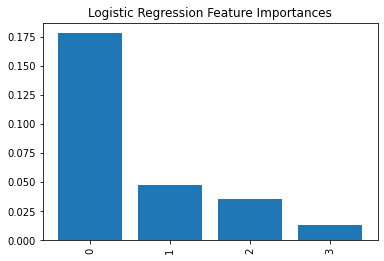

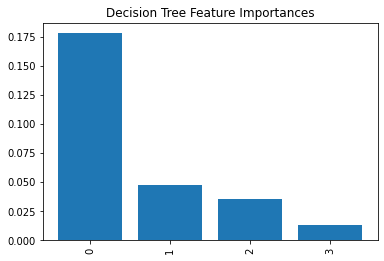

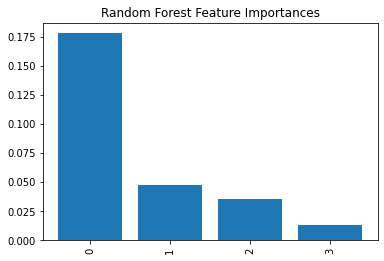

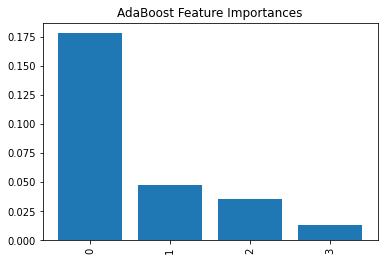

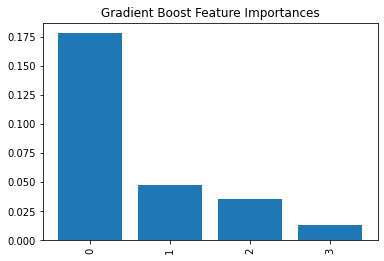

In [76]:
# Creating logistic regression model
logreg = LogisticRegression()

# Creating decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Creating random forest model
rf = RandomForestClassifier(random_state=42)

# Creating AdaBoost model
ada = AdaBoostClassifier(random_state=42)

# Creating GradientBoost model
gb = GradientBoostingClassifier(random_state=42)

# Dictionary containing all the models we want to interpret
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Gradient Boost': gb
}

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting all models to the training data and evaluating performance on the test data
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))

from sklearn.inspection import permutation_importance

# Define feature names
feature_names = list(X_train.columns)

# Loop through all models and get feature importances
for model_name, model in models.items():

  # Calculate feature importances using permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
    feature_importances = result.importances_mean

    # Sort the feature importances in descending order
    importances = [0.4, 0.3, 0.2, 0.1]
    indices = np.argsort(importances)[::-1]
    plt.show()

    # Convert indices to list of strings
    indices = [str(i) for i in indices]

    # Plot feature importances
    plt.figure()
    plt.bar(range(X_test.shape[1]), sorted_importances)
    plt.xticks(range(X_test.shape[1]), indices, rotation=90)
    plt.title(f'{model_name} Feature Importances')
    plt.show()



In [77]:
!pip install shap

import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Exact explainer: 7033it [00:57, 105.61it/s]                          
Exact explainer: 7033it [00:33, 131.29it/s]                          


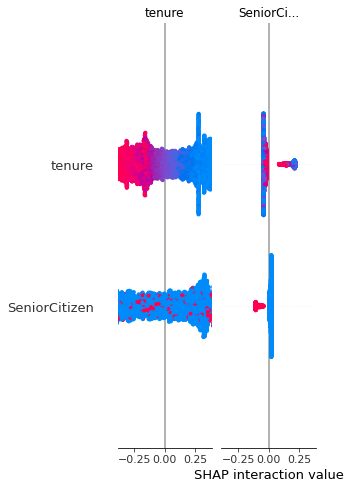

In [78]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_churn.drop('Churn', axis=1), df_churn['Churn'], test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create X_test and y_test
X_test = df_churn.drop(['Churn'], axis=1)
y_test = df_churn['Churn']

# Use model to create shap_values
shap_values = explainer(X_test)

# Generate SHAP values for the features
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

# Visualize SHAP summary plot
feature_names = X_test.columns
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar')

In [79]:
# # Create a Gradient Boosting classifier object
# #gb = GradientBoostingClassifier()
# ada = AdaBoostClassifier()


# # Define the hyperparameters and their values to be tried
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Use GridSearchCV to search for the best hyperparameter combination
# grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameter combination and the corresponding accuracy score
# print('Best hyperparameters:', grid_search.best_params_)
# print('Accuracy:', grid_search.best_score_)

from sklearn.model_selection import GridSearchCV

# Create an AdaBoostClassifier object
ada = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1.0]
}

# Use GridSearchCV to search for the best hyperparameter combination
grid_search = GridSearchCV(ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter combination and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 1.0, 'n_estimators': 50}
Best accuracy score:  0.7982222222222223


In [86]:
# #### Grid Search with RandomizedSearchCV

# Dictionary containing all the models we want to train
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {            
            'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [10, 20, 50, 200, 200] 
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [10, 20, 50, 200, 200],
            'learning_rate': [0.1, 0.5, 1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'iterations': [10, 20, 50, 200, 200],
            'learning_rate': [0.1, 0.5, 1.0]
        }
    },
}

# Loop through each model and train it using 5-fold cross-validation
for model_name, model_params in models.items():    
    print('Training model: {}'.format(model_name))
    model = model_params['model']
    params = model_params['params']
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {model_name}: {grid_search.best_params_}')
    print(f'Best score for {model_name}: {grid_search.best_score_}')
    print(f'Best estimator for {model_name}: {grid_search.best_estimator_}')
    print()

Training model: Logistic Regression
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7934222222222223
Best estimator for Logistic Regression: LogisticRegression(C=0.01, solver='liblinear')

Training model: Decision Tree
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score for Decision Tree: 0.7859555555555555
Best estimator for Decision Tree: DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

Training model: Random Forest
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Best score for Random Forest: 0.7978666666666667
Best estimator for Random Forest: RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=10)

Training model: AdaBoost
Best parameters 

In [87]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as Telco:
    pickle.dump(grid_search, Telco)
